# Analysis of Vodafone users' fluxes

The study of the flux of people inside urban areas is of paramount importance to achieve an optimal understanding of emerging critical issues in the local mobility, and to explore areas of potential improvements in the infrastructures and local transports.

The mobility of users within and toward Padova has been monitored using the data provided by the Vodafone mobile carrier, which provides the information based on the users' connections to the network cells.
The data provided by the carrier encompasses the monitoring of the users connected to the Vodafone network in Padova in a four-month period from February to May of 2018.

To provide statistical insights on the number and the flow of users, the data is aggregated based on the origin and movements of the users by averaging the number of connections during the time of the monitoring.

To further avoid privacy violation issues, all observations with less than 30 units (e.g. day-areas for which $<$30 users have contributed) have been discarded and/or merged into dedicated categories (indicated with "altro", or "other").


## Datasets 

The data is provided in `.csv` files.

* __day_od.csv__: table of the origins and destinations of the users averaged by the day of the week. The data is provided with details of the month, type of user (resident in Padova/Italian visitor/foreign visitor), country of provenance, together with the province and comune of the user (if available).
* __distinct_users_day.csv__: table of the number of distinct users by origin. The data is provided with details of the month, type of user (resident in Padova/Italian visitor/foreign visitor), country of provenance, together with the province and comune of the user (if available).

The information is stored in the fields according to the following scheme: 

- __MONTH__: month analyzed
- __DOW__: day analyzed
- __ORIGIN__: users' origin area (do not consider this field)
- __DESTINATION__: users' destination area (do not consider this field)
- __CUST_CLASS__: user type (resident / Italian visitor / foreigner visitor)
- __COD_COUNTRY__: users' country code (e.g. 222=Italy)
- __COD_PRO__: users' province code (e.g. 12=Varese) 
- __PRO_COM__: users' comune code (e.g. 12026=Busto Arsizio)
- __FLOW__: number of movements for given date-time (with a minimum of 30 users)
- __VISITORS__: overall number of users 

Together with the data files, three lookup-tables are provided to allow matching the Italian institute of STATistics (ISTAT) country, province and comune codes to the actual names.

* __codici_istat_comune.csv__: lookup file containing the mapping between _comune_ ISTAT code-names
* __codici_istat_provincia.csv__: lookup file containing the mapping between _province_ ISTAT code-names
* __codici_nazioni.csv__: lookup file containing mapping the _country_ code to its name

Additional information, useful for the study of the flow of users, as the number of inhabitants of each province and the distance between Padova and all other Italian provinces can be extracted based on the data collected by the ISTAT:

   - English: https://www.istat.it/en/analysis-and-products/databases, Italian: https://www.istat.it/it/dati-analisi-e-prodotti/banche-dati
   
   - English/Italian: https://www.istat.it/en/archive/157423, Italian: https://www.istat.it/it/archivio/157423
   
   - `.zip` package containing the distances between comuni in Veneto region: http://www.istat.it/storage/cartografia/matrici_distanze/Veneto.zip

If deemed useful, the open repository [https://github.com/openpolis/geojson-italy](https://github.com/openpolis/geojson-italy) contains a `.json` file with the geographical coordinates of the provences and comuni of Italy.


## Assignments

1. Data preparation: the csv files are originated from different sources, hence resulting in differences in the encoding and end-of-lines that have to be taken into account in the data preparation phase. Make sure each .csv file is properly interpreted.

   1.1 Ranking of visitors from foreign countries: based on the number of total visitors per each country, create a ranked plot of the first 20 countries with the most visitors
   
   1.2 Ranking of Italian visitors by province, weighted by the number of inhabitants: based on the number of total visitors per Italian province, create a ranked plot of the first 20 provinces with the most visitors taking into account the number of inhabitants.


2. Study of the visitors' fluxes: you are asked to provide indications on how to invest resources to improve the mobility towards Padova. Consider the three main directions of visitors and commuters getting to Padova through the main highways (from south, A13 towards Bologna-Roma; from west, A4 towards Milano-Torino; from north-east, A4 towards Venice-Trieste). Evaluate which of the three directions has to be prioritized.

   2.1 Consider a simplified case involving only the mid-range mobility, based on the number of visitors/commuters from the nearby regions only
   
   2.2 Consider the provinces located on the three directions that are mostly contributing to the flow of weekend visitors and working daily commuters by performing a more detailed study of the fluxes based on the day of the week. Use the data available to provide what you believe is the best possible answer.


3. Plot the distribution of the number of visitors by the distance of the province of origin. Determine which kind of function should be used to describe the distribution.

   3.1 Assuming an analytic form can be used to describe the trend, create a regression or a fit to estimate the expected number of visitors by the distance of the province of origin and the corresponding uncertainties. Illustrate the difference between the resulting regression with respect to the numbers provided by the Vodafone monitoring, and highlight the five most striking discrepancies from the expectations.

In [25]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [26]:
prov_code = pd.read_csv('codici_istat_provincia.csv', sep=';', encoding = 'mbcs')#file using mbs encoding
prov_code = prov_code[prov_code['COD_REG']>0]
prov_code 

,COD_REG,COD_PRO,PROVINCIA,PROV_SIGLA
0,1,1,Torino,TO
1,1,2,Vercelli,VC
2,1,3,Novara,NO
3,1,4,Cuneo,CN
4,1,5,Asti,AT
...,...,...,...,...
102,20,90,Sassari,SS
103,20,91,Nuoro,NU
104,20,92,Cagliari,CA
105,20,95,Oristano,OR


In [27]:
reg_code = pd.read_csv('codici_istat_regioni.csv', sep=';', encoding='UTF-8') #file using ETF-8 encoding
reg_code

,COD_REG,REG_NAME
0,1,Piemonte
1,2,Valle d'Aosta
2,3,Lombardia
3,4,Trentino-Alto Adige/Südtirol
4,5,Veneto
5,6,Friuli-Venezia Giulia
6,7,Liguria
7,8,Emilia-Romagna
8,9,Toscana
9,10,Umbria


In [28]:
df_user = pd.read_csv('distinct_users_day.csv', sep=',', encoding = 'mbcs') #file using mbs encoding
df_user = df_user[df_user['CUST_CLASS']=='visitor'] #filter visitors only, as we only analize visitors
df_user = df_user[df_user['COD_PRO']>0] #there are some data without province code so we mask the COD_PRO
df_user

,DOW,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,VISITORS
0,Mercoledì,visitor,222.0,35.0,35033.0,968
1,Lunedì,visitor,222.0,22.0,22098.0,64
2,Domenica,visitor,222.0,52.0,52032.0,516
3,Giovedì,visitor,222.0,108.0,108009.0,128
4,Giovedì,visitor,222.0,29.0,29048.0,512
...,...,...,...,...,...,...
12828,Martedì,visitor,222.0,65.0,65052.0,36
12829,Giovedì,visitor,222.0,22.0,22017.0,40
12830,Martedì,visitor,222.0,16.0,16053.0,36
12831,Venerdì,visitor,222.0,78.0,78031.0,36


In [29]:
#merge distinct use dataframe with prov_code to find region_code
df_user = pd.merge(df_user,prov_code[['COD_PRO','COD_REG']], on ='COD_PRO', how='left') #merge with prov_code to find names of prov
df_user

,DOW,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,VISITORS,COD_REG
0,Mercoledì,visitor,222.0,35.0,35033.0,968,8.0
1,Lunedì,visitor,222.0,22.0,22098.0,64,4.0
2,Domenica,visitor,222.0,52.0,52032.0,516,9.0
3,Giovedì,visitor,222.0,108.0,108009.0,128,3.0
4,Giovedì,visitor,222.0,29.0,29048.0,512,5.0
...,...,...,...,...,...,...,...
12300,Martedì,visitor,222.0,65.0,65052.0,36,15.0
12301,Giovedì,visitor,222.0,22.0,22017.0,40,4.0
12302,Martedì,visitor,222.0,16.0,16053.0,36,3.0
12303,Venerdì,visitor,222.0,78.0,78031.0,36,18.0


In [30]:
#merge with reg_code to find region name
df_user = pd.merge(df_user,reg_code[['COD_REG','REG_NAME']], on ='COD_REG', how='left') 
df_user

,DOW,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,VISITORS,COD_REG,REG_NAME
0,Mercoledì,visitor,222.0,35.0,35033.0,968,8.0,Emilia-Romagna
1,Lunedì,visitor,222.0,22.0,22098.0,64,4.0,Trentino-Alto Adige/Südtirol
2,Domenica,visitor,222.0,52.0,52032.0,516,9.0,Toscana
3,Giovedì,visitor,222.0,108.0,108009.0,128,3.0,Lombardia
4,Giovedì,visitor,222.0,29.0,29048.0,512,5.0,Veneto
...,...,...,...,...,...,...,...,...
12300,Martedì,visitor,222.0,65.0,65052.0,36,15.0,Campania
12301,Giovedì,visitor,222.0,22.0,22017.0,40,4.0,Trentino-Alto Adige/Südtirol
12302,Martedì,visitor,222.0,16.0,16053.0,36,3.0,Lombardia
12303,Venerdì,visitor,222.0,78.0,78031.0,36,18.0,Calabria


In [31]:
#Sum all visitors by regions
reg_sum = df_user.groupby(["COD_REG","REG_NAME"]).sum("VISITORS").reset_index().drop(["COD_COUNTRY","COD_PRO","PRO_COM"], axis=1) #sum by reg name and drop unneccessary columns
reg_sum = reg_sum.sort_values("VISITORS", ascending = False) #sort by highest visitor
reg_sum

,COD_REG,REG_NAME,VISITORS
4,5.0,Veneto,3694168
2,3.0,Lombardia,360480
7,8.0,Emilia-Romagna,233648
5,6.0,Friuli-Venezia Giulia,111564
11,12.0,Lazio,105540
3,4.0,Trentino-Alto Adige/Südtirol,93184
8,9.0,Toscana,74536
0,1.0,Piemonte,64904
15,16.0,Puglia,42396
14,15.0,Campania,37620


In [32]:
#import neccesary library for mapping
from IPython.display import GeoJSON
from shapely.geometry import Point, Polygon
import geojsonio
from geojsonio import display
import geopandas as gpd
!pip install geopy

In [34]:
province_map = gpd.read_file("limits_IT_provinces.geojson") #read geojson file from github
province_map = province_map.to_crs(epsg=3395)#convert to crs epsg 3395 for europe area
province_map =province_map[["prov_name","geometry"]] #we only use prov name and geometry
province_map ["centroid"] = province_map.geometry.centroid #find the centroid of all provinces
province_map

,prov_name,geometry,centroid
0,Torino,"POLYGON ((878752.714 5683118.243, 879038.272 5...",POINT (828151.657 5614226.273)
1,Vercelli,"POLYGON ((882652.603 5708555.535, 882300.233 5...",POINT (913812.164 5674371.462)
2,Novara,"POLYGON ((937397.707 5722456.413, 937341.607 5...",POINT (952202.685 5680227.092)
3,Cuneo,"MULTIPOLYGON (((773158.761 5501986.487, 773374...",POINT (844714.828 5509741.980)
4,Asti,"POLYGON ((886865.400 5609620.539, 886915.163 5...",POINT (911237.651 5572188.460)
...,...,...,...
102,Sassari,"MULTIPOLYGON (((1053641.038 4933865.175, 10536...",POINT (997953.527 4947348.291)
103,Nuoro,"MULTIPOLYGON (((1033085.625 4826524.311, 10327...",POINT (1042956.313 4865065.601)
104,Cagliari,"MULTIPOLYGON (((1002568.290 4741532.297, 10035...",POINT (1013844.051 4724440.371)
105,Oristano,"MULTIPOLYGON (((977608.314 4865984.895, 978308...",POINT (970347.818 4837073.974)


In [45]:
padova_point = province_map.loc[province_map['prov_name'] == 'Padova'] #select padova geolocation
point = padova_point.iat[0,2] #point of padova

In [55]:
region_map = gpd.read_file("limits_IT_regions.geojson") #read geojson file from github
region_map = region_map.to_crs(epsg=3395)#convert to crs epsg 3395 for europe area
region_map = region_map[["reg_name", "geometry"]] #we will only use region name and geometry columns
region_map ["centroid"] = region_map.geometry.centroid #find the centroid of each location
region_map

,reg_name,geometry,centroid
0,Piemonte,"POLYGON ((794381.197 5635330.571, 794377.480 5...",POINT (882175.524 5601954.486)
1,Valle d'Aosta/Vallée d'Aoste,"POLYGON ((861006.714 5737412.768, 861156.991 5...",POINT (822349.965 5706664.062)
2,Lombardia,"MULTIPOLYGON (((955080.923 5710030.603, 954600...",POINT (1087491.019 5689999.332)
3,Trentino-Alto Adige/Südtirol,"POLYGON ((1337388.103 5838042.778, 1337365.200...",POINT (1256038.871 5820892.801)
4,Veneto,"POLYGON ((1183925.104 5675704.363, 1183580.527...",POINT (1319890.470 5694360.917)
5,Friuli-Venezia Giulia,"MULTIPOLYGON (((1504695.802 5810993.097, 15047...",POINT (1452999.281 5774570.663)
6,Liguria,"MULTIPOLYGON (((840646.563 5419463.099, 841869...",POINT (969149.588 5476862.394)
7,Emilia-Romagna,"MULTIPOLYGON (((1038898.142 5549819.859, 10387...",POINT (1228808.573 5517285.760)
8,Toscana,"MULTIPOLYGON (((1101824.610 5461013.358, 11014...",POINT (1238401.401 5352329.272)
9,Umbria,"MULTIPOLYGON (((1464796.092 5230532.468, 14647...",POINT (1390344.763 5277962.864)


<AxesSubplot:>

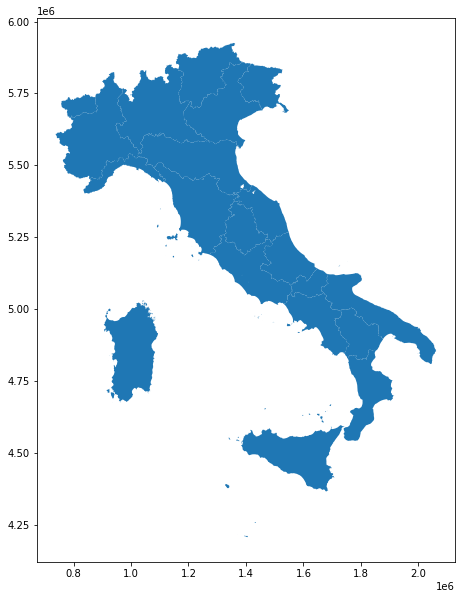

In [56]:
region_map.plot(figsize = (20,10))

In [57]:
region_map =region_map.drop(4) #drop veneto as we want nearby regions
region_map = region_map.assign(dist_to_padova=region_map.distance(point)) #assign distance towards padova
#sort by minimum value of distance
region_map =region_map.sort_values(by = 'dist_to_padova', ascending = True)
region_map

,reg_name,geometry,centroid,dist_to_padova
7,Emilia-Romagna,"MULTIPOLYGON (((1038898.142 5549819.859, 10387...",POINT (1228808.573 5517285.760),5.864093e+04
2,Lombardia,"MULTIPOLYGON (((955080.923 5710030.603, 954600...",POINT (1087491.019 5689999.332),7.440752e+04
3,Trentino-Alto Adige/Südtirol,"POLYGON ((1337388.103 5838042.778, 1337365.200...",POINT (1256038.871 5820892.801),9.259083e+04
5,Friuli-Venezia Giulia,"MULTIPOLYGON (((1504695.802 5810993.097, 15047...",POINT (1452999.281 5774570.663),1.125865e+05
8,Toscana,"MULTIPOLYGON (((1101824.610 5461013.358, 11014...",POINT (1238401.401 5352329.272),1.789183e+05
10,Marche,"POLYGON ((1380385.001 5360461.489, 1380286.784...",POINT (1462958.373 5335432.106),2.383929e+05
9,Umbria,"MULTIPOLYGON (((1464796.092 5230532.468, 14647...",POINT (1390344.763 5277962.864),2.741819e+05
6,Liguria,"MULTIPOLYGON (((840646.563 5419463.099, 841869...",POINT (969149.588 5476862.394),2.748721e+05
0,Piemonte,"POLYGON ((794381.197 5635330.571, 794377.480 5...",POINT (882175.524 5601954.486),3.036847e+05
11,Lazio,"MULTIPOLYGON (((1314784.083 5253584.630, 13149...",POINT (1420942.936 5129964.255),3.880154e+05


In [58]:
closest_regs = region_map[0:4] #sort the smallest distance a.k.a closest regions
#rename the title so it will be compatible to another data
closest_regs = closest_regs.rename(columns={'reg_name':'REG_NAME', 'geometry':'GEOMETRY', 'centroid':'CENTROID', 'dist_to_padova':'DIST_TO_PADOVA'})
#merge the number of visitors from reg_sum dataframe
closest_visitors = pd.merge(closest_regs,reg_sum[["REG_NAME", "VISITORS"]], on="REG_NAME", how="left") 
closest_visitors = closest_visitors.sort_values(by = 'VISITORS', ascending = False) #sort by highest visitor value
closest_visitors

,REG_NAME,GEOMETRY,CENTROID,DIST_TO_PADOVA,VISITORS
1,Lombardia,"MULTIPOLYGON (((955080.923 5710030.603, 954600...",POINT (1087491.019 5689999.332),74407.520384,360480
0,Emilia-Romagna,"MULTIPOLYGON (((1038898.142 5549819.859, 10387...",POINT (1228808.573 5517285.760),58640.926392,233648
3,Friuli-Venezia Giulia,"MULTIPOLYGON (((1504695.802 5810993.097, 15047...",POINT (1452999.281 5774570.663),112586.487136,111564
2,Trentino-Alto Adige/Südtirol,"POLYGON ((1337388.103 5838042.778, 1337365.200...",POINT (1256038.871 5820892.801),92590.827377,93184


In [52]:
#Finding Highways coordinate in italy to use for visitors flux
#(from south, A13 towards Bologna-Roma; from west, A4 towards Milano-Torino; from north-east, A4 towards Venice-Trieste)
closest_visitors = closest_visitors.assign(Highway = ["A4 towards Milano-Torino", "A13 towards Bologna-Roma", "A4 towards Venice-Trieste", "A4 towards Milano-Torino"])
closest_visitors

,REG_NAME,GEOMETRY,CENTROID,DIST_TO_PADOVA,VISITORS,Highway
1,Lombardia,"MULTIPOLYGON (((955080.923 5710030.603, 954600...",POINT (1087491.019 5689999.332),74407.520384,360480,A4 towards Milano-Torino
0,Emilia-Romagna,"MULTIPOLYGON (((1038898.142 5549819.859, 10387...",POINT (1228808.573 5517285.760),58640.926392,233648,A13 towards Bologna-Roma
3,Friuli-Venezia Giulia,"MULTIPOLYGON (((1504695.802 5810993.097, 15047...",POINT (1452999.281 5774570.663),112586.487136,111564,A4 towards Venice-Trieste
2,Trentino-Alto Adige/Südtirol,"POLYGON ((1337388.103 5838042.778, 1337365.200...",POINT (1256038.871 5820892.801),92590.827377,93184,A4 towards Milano-Torino


In [53]:
closest_visitors.groupby('Highway').sum().sort_values("VISITORS", ascending = False) 

,DIST_TO_PADOVA,VISITORS
Highway,,
A4 towards Milano-Torino,166998.347761,453664
A13 towards Bologna-Roma,58640.926392,233648
A4 towards Venice-Trieste,112586.487136,111564


ImportError: The 'mapclassify' or 'pysal' package is required to use the 'scheme' keyword

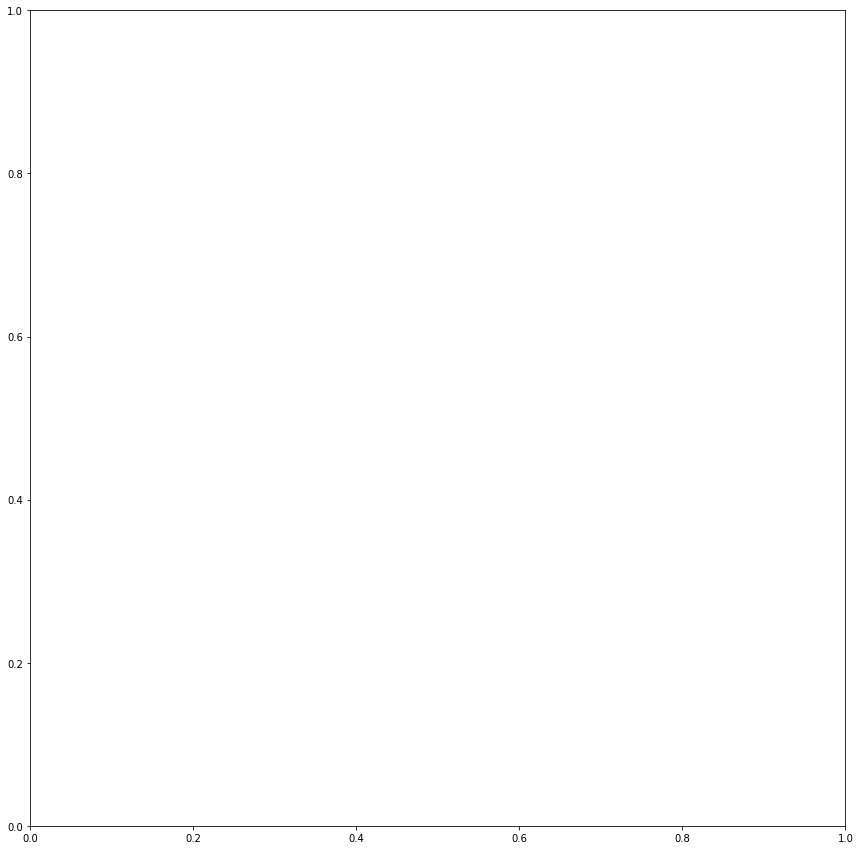

In [61]:
closest_visitors.plot(column='VISITORS', scheme ='quantiles', figsize=(25, 15),legend=True,cmap='coolwarm')
plt.xlim(-130,-60)
plt.ylim(20,55)